## Interactive Arduino/Python Heart Monitor
- Upload the send_serial.ino code onto the Arduino using the IDE, and make sure to note the COM port
- The optimal setup is two signal electrodes above and below the chest, and one reference electrode on the right ankle.
- Verify that your EKG is working by using the ide serial plotter.
- Now we will use the Arduino to digitize the EKG signal. Disconnect the leads from your lab partner, disconnect the oscilloscope probes, and connect the output of your amplifier to Arduino pin A0, and the ground of your circuit to the 3.3V pin of the Arduino board.
**Before reconnecting the EKG leads, be sure that the your circuit GROUND is only connected to the 3.3V Arduino pin, and that any ground connection to an oscilloscope or power supply is disconnected (otherwise you risk damaging the Arduino).**
- Reconnect the EKG leads to the electrodes and run the following code to acquire the EKG signal. Be sure to insert the correct COM port.

In [4]:
# allows plots to be plotted right below the cell when run
%matplotlib inline 
import serial # the library for reading from serial com ports
import numpy as np # naming convention for numpy library
import matplotlib.pyplot as plt # naming convention for matplotlib
from scipy.fftpack import fft, ifft # import discrete fourier transform and its inverse
from scipy import signal

In [40]:
def sample_arduino():
    # preamble to set up serial communications
    device = "/dev/cu.usbmodem1421" # com port of Arduino <- CHANGE THIS TO THE ONE YOU FOUND
    baud = 115200
    ser = serial.Serial(device, baud, timeout=10)

    # read in every line of serial code and throw away corrupt data
    def read_serial_data(N):
        raw_data = []
        while (len(raw_data) < N+10): 
            data = ser.readline()
            raw_data.append(data)
        data = []
        for i in raw_data:
            try:
                data.append(float(i))
            except:
                continue
        return data
    raw_data = read_serial_data(3000) # <- Adjust this line to read in more/less data
    ser.close()
    return raw_data[50:]

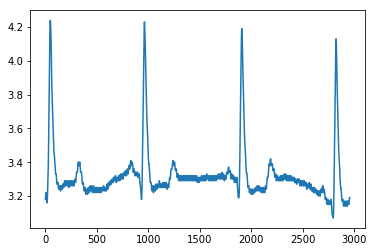

In [42]:
signal = sample_arduino()
plt.plot(signal) # change the indices to zoom in/out in time

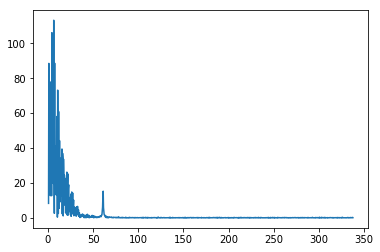

In [137]:
dft = fft(signal) # calculate fourier transform
fs = 1000 # SAMPLING RATE, needs to match send_serial.ino code
N = len(dft) # length of discrete fourier transform
freqs = [i*fs/N for i in range(N)] # convert from dft frequencies to Hz
plt.plot(freqs[2:1000], np.abs(dft[2:1000])) # change the indices to zoom in/out in frequency

In [147]:
#Make a function to plot the output and calculate heart rate.
import operator
def heart_rate_monitor(freqs, dft):
    freqs = freqs[1:5]
    dft = np.abs(dft[1:5])
    max_val = np.amax(np.real(dft))
    max_ind = np.where(dft==max_val)
    freq = freqs[max_ind[0][0]]
    heart_rate = (1/freq)*60
    return heart_rate

In [148]:
rate = heart_rate_monitor(freqs, dft)
print("Your heart rate is %d b/m" % rate) # Print result

Your heart rate is 59 b/m
